In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc = {'figure.figsize':(12,9)})

from wrangle_zillow import wrangle_zillow, scaled_zillow_columns
from explore import elbow_plot, run_kmeans, add_to_train

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
train, validate, test = wrangle_zillow()


In [3]:
X_train = train.drop(columns=['error'])
y_train = train[['error']]

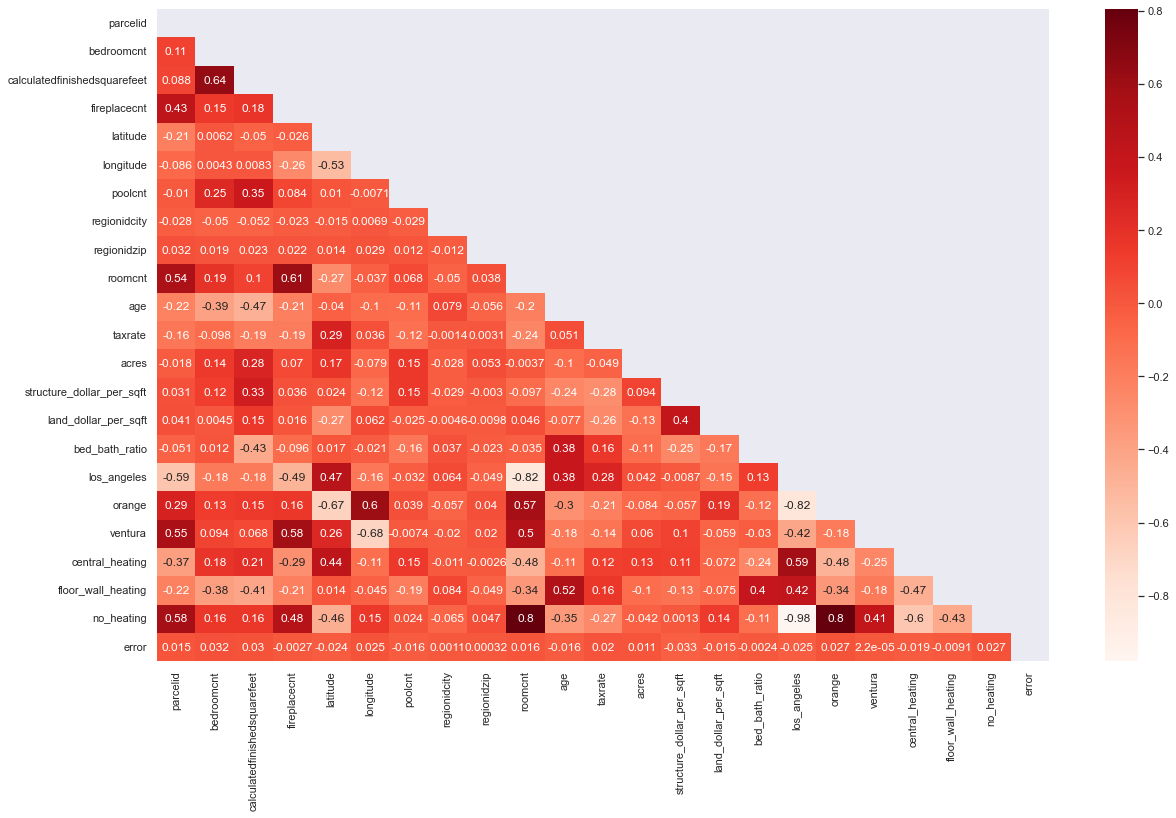

In [8]:
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20,12))
sns.heatmap(train.corr(), cmap='Reds', annot=True, mask=mask)
plt.show()

In [9]:
import math
abs(train.corr().error).sort_values(ascending = False)

error                           1.000000
structure_dollar_per_sqft       0.032991
bedroomcnt                      0.031790
calculatedfinishedsquarefeet    0.030269
orange                          0.027129
no_heating                      0.027107
longitude                       0.025376
los_angeles                     0.025052
latitude                        0.023663
taxrate                         0.020288
central_heating                 0.018522
poolcnt                         0.015922
roomcnt                         0.015894
age                             0.015559
parcelid                        0.015402
land_dollar_per_sqft            0.014654
acres                           0.010879
floor_wall_heating              0.009072
fireplacecnt                    0.002726
bed_bath_ratio                  0.002376
regionidcity                    0.001073
regionidzip                     0.000318
ventura                         0.000022
Name: error, dtype: float64

**Conclusion:**

- structure dollar per sqft has the highest correlation overall to logerror
- Orange and LA county are in the top 7 with having the highest correlation to logerror
- longitude and latitude are also in the top ten but that makes sense given that Orange and LA are listed higher
- There is a difference in errors but it is significant?

In [10]:
la_error = train[train.los_angeles == 1].error
orange_error = train[train.orange == 1].error
ventura_error = train[train.ventura == 1].error

Equal Variance?



In [11]:
from scipy import stats

stats.levene(la_error, orange_error, ventura_error)

LeveneResult(statistic=18.929427065016213, pvalue=6.0899900130145475e-09)

In [12]:
alpha = .05


In [13]:
from scipy.stats import f_oneway


In [14]:
f, p = f_oneway(la_error, orange_error, ventura_error)
p


2.3769601834158e-05

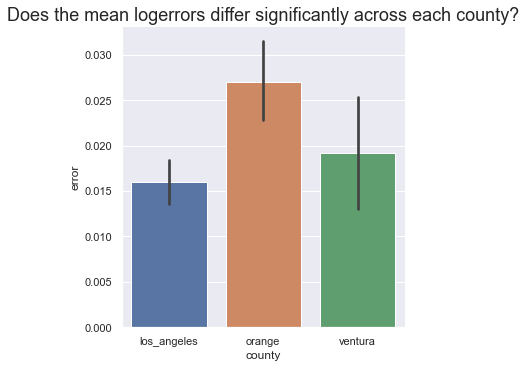

In [15]:
sns.catplot(x="county", y="error", kind="bar", data=train)
plt.title("Does the mean logerrors differ significantly across each county?", size = 18)
plt.show()

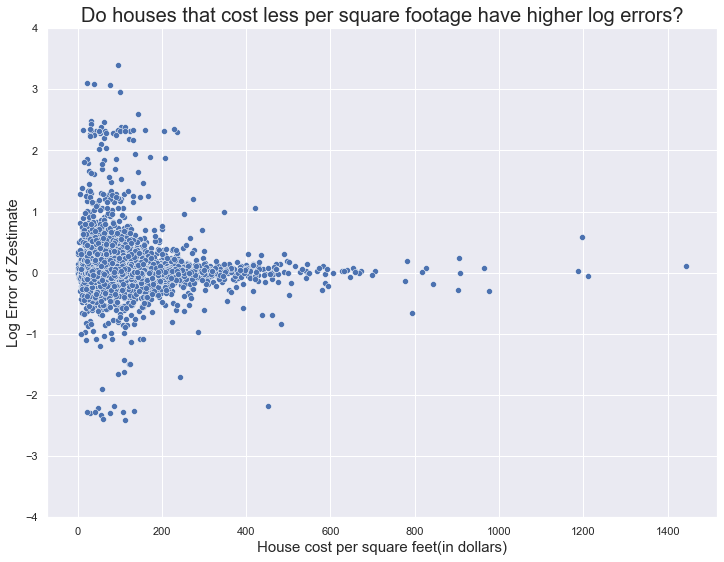

In [16]:
sns.scatterplot(x = 'structure_dollar_per_sqft', y = 'error', data = train)
plt.title("Do houses that cost less per square footage have higher log errors?", size = 20)
plt.xlabel("House cost per square feet(in dollars)", size = 15)
plt.ylabel("Log Error of Zestimate", size = 15)
plt.ylim(-4, 4)
plt.show()

Is there a significance?



- null_hypothesis = "Log errors in low cost per sqft are the same as the log errors for the rest of the houses"
- alternative_hypothesis = "Log errors in low cost per sqft are different than the log errors for the rest of the houses" 

In [17]:
low_cost_sqft = train[train.structure_dollar_per_sqft < 200]
t, p = stats.ttest_1samp(low_cost_sqft.error, train.error.mean())
t, p

(0.3241526634826559, 0.7458249674639303)

Is there a significant difference in logerrors between bedrooms?



In [18]:
one_bed = train[train.bedroomcnt == 1].error
two_bed = train[train.bedroomcnt == 2].error
three_bed = train[train.bedroomcnt == 3].error
four_bed = train[train.bedroomcnt == 5].error
five_bed = train[train.bedroomcnt == 4].error
six_bed = train[train.bedroomcnt == 6].error
seven_bed = train[train.bedroomcnt == 7].error

In [19]:
f, p = f_oneway(one_bed, two_bed, three_bed, four_bed, five_bed, six_bed, seven_bed)
p

1.2878894227156024e-06

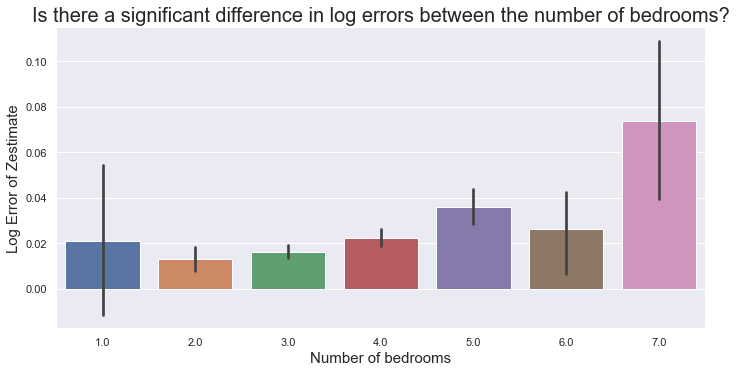

In [20]:
sns.catplot(x="bedroomcnt", y="error", kind="bar", data=train, height=5, aspect=2)
plt.title("Is there a significant difference in log errors between the number of bedrooms?", size = 20)
plt.xlabel("Number of bedrooms", size = 15)
plt.ylabel("Log Error of Zestimate", size = 15)
plt.show()